# CoMoMo analysis

Version: 03/06/2020

Author : JAH, JJGC

In [228]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = 8, 6
plt.rcParams["font.size"     ] = 12

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Thu Jun  4 17:12:48 2020


In [3]:
import numpy as np
import pandas as pd
import matplotlib

In [5]:
import c19.data_functions_momo as momodata
import c19.momo_analysis       as c19ma

import c19.useir            as us
import c19.kfilter          as kf
import c19.ana_useir        as aus

import scipy          as sp
import scipy.stats    as stats
import scipy.optimize as optimize

from numpy.linalg import inv
m_   = np.matmul
npa  = np.array

## Data

### Load Data

In [6]:
path = '/Users/hernando/investigacion/bio/c19/cdata/'
dfv, dfe, dfc = momodata.comomo_from_csv(path=path)

In [7]:
dfv.head()

,Andalucia,Date,Aragon,Asturias,Baleares,Canarias,Cantabria,Castilla La Mancha,Castilla y Leon,Cataluna,C. Valenciana,Extremadura,Galicia,Madrid,Melilla,Murcia,Navarra,Pais Vasco,La Rioja
0,0.0,2020-03-05,0.0,0.0,2.0,0.0,0.5,13.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,0.0,1.0,0.0
1,1.5,2020-03-06,1.0,0.0,2.5,0.0,0.0,3.0,0.0,0.0,13.0,0.0,0.0,12.0,0.0,0.0,1.0,0.0,0.0
2,0.0,2020-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,1.5,9.0,0.0,2.5,0.0,1.5,6.0
3,0.0,2020-03-08,1.0,0.0,4.5,0.0,2.0,0.5,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,4.5,4.0,0.0
4,0.0,2020-03-09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,8.0,0.0,0.0,0.0,16.0,2.0


In [8]:
def ca_cases(caname):
    dates  = dfv.Date.values
    cases  = dfv[caname].values
    ucases = dfe[caname].values
    return dates, cases, ucases

## KF smoothing

In [255]:
def ana_ca(caname, times, blind = False, ax = None, plot = True):
    dates, cases, ucases = ca_cases(caname)
    dates_blind  = ('2020-03-20', '2020-04-10')
    
    dates_blind = ('2020-03-25','2020-04-05') if blind is True else ('2020-07-25','2020-08-05')

    betas, betas2 = us.useir_kfs_comomo(dates, cases, ucases, times, dates_blind = dates_blind, q0 = 1.e-4)
    
    if (plot):
        if (ax is None): plt.figure(figsize = ((8, 6)))
        plt.errorbar(dates, cases, yerr = ucases, ls = '', marker = '*', color = 'black', ms = 4);
        c19ma.formatter(plt.gca()); plt.title(caname)
        ax2 = plt.gca().twinx()
        ax2.errorbar(dates, betas[0] , yerr = betas[1] , ls = '--', marker = 'o', ms = 4, label = 'smoother')
        ax2.errorbar(dates, betas2[0], yerr = betas2[1], ls = '--', marker = 'o', ms = 3, label = 'filter')
        ax2.grid(which = 'both'); plt.legend(); c19ma.formatter(plt.gca()); plt.ylim((0., 8.)); #plt.yscale('log')

    xdata = {'dates': dates, 'cases': cases, 'ucases': ucases,
            'rs'   : betas[0], 'urs' :betas[1],
            'rfs'  : betas2[0], 'urfs' :betas2[1]}
    return xdata

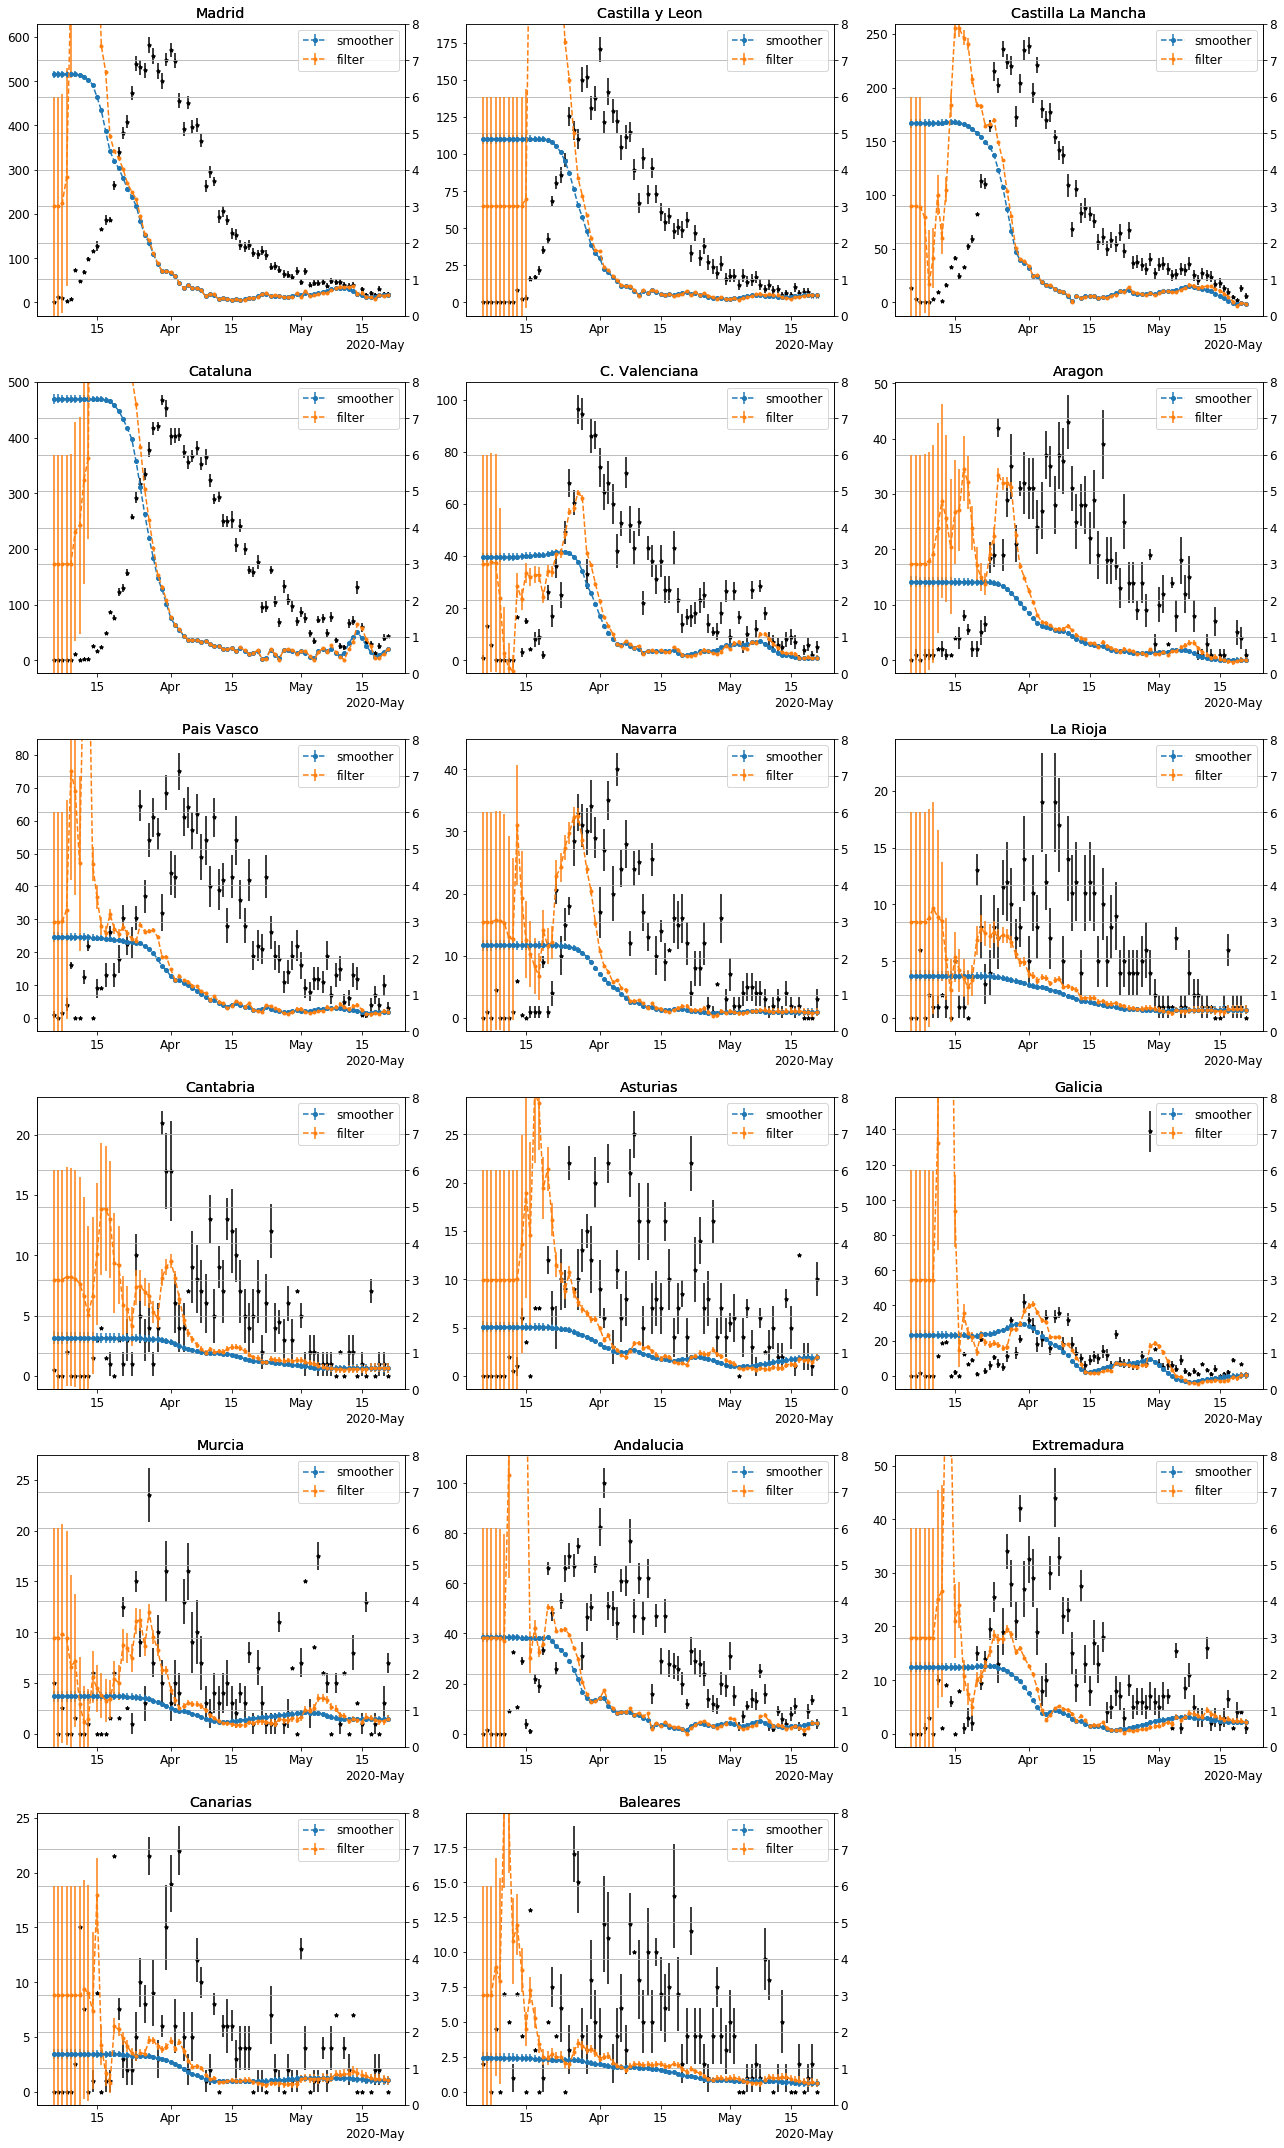

In [259]:
ti, tr, tm = 5.5, 3., 6.
times = (ti, tr, tm)
blind = False

canames = ['Madrid', 'Castilla y Leon', 'Castilla La Mancha',
           'Cataluna', 'C. Valenciana', 'Aragon',
           'Pais Vasco', 'Navarra', 'La Rioja',
           'Cantabria', 'Asturias', 'Galicia',
           'Murcia', 'Andalucia', 'Extremadura',
           'Canarias', 'Baleares']
ncols, nrows = 3, 6
plt.figure(figsize = (ncols * 6, nrows * 5))

blind = False
for i, caname in enumerate(canames):
    ax = plt.subplot(nrows, ncols, i + 1, axisbelow=True)
    ana_ca(caname, times, blind, ax)
    plt.title(caname)
plt.tight_layout()

### Scan removal time (infecting)

(5.5, 2, 6.0)
(5.5, 3, 6.0)
(5.5, 4, 6.0)
(5.5, 5, 6.0)
(5.5, 6, 6.0)


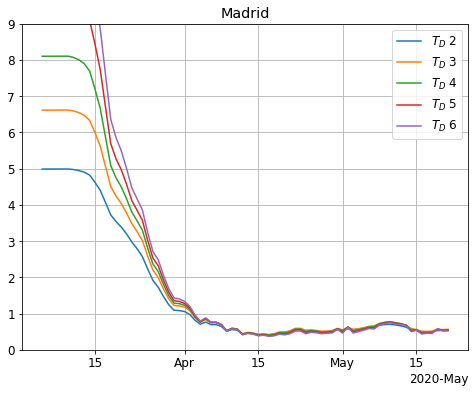

In [284]:
blind = False
caname = 'Madrid'
tds    = (2, 3, 4, 5, 6)
plt.figure(figsize = (8, 6))
for xtd in tds:
    times = (5.5, xtd, 6.)
    print(times)
    xdata = ana_ca(caname, times, blind = blind, plot = False) 
    dates, rs = xdata['dates'], xdata['rs']
    plt.plot(dates, rs, label = r'$T_D$ '+str(xtd))
c19ma.formatter(plt.gca()); plt.grid();
plt.legend(); plt.title(caname); plt.ylim((0., 9));

In [ ]:
### Scan removal time of infection

(2, 3.5, 6.0)
(3, 3.5, 6.0)
(4, 3.5, 6.0)
(5, 3.5, 6.0)
(6, 3.5, 6.0)


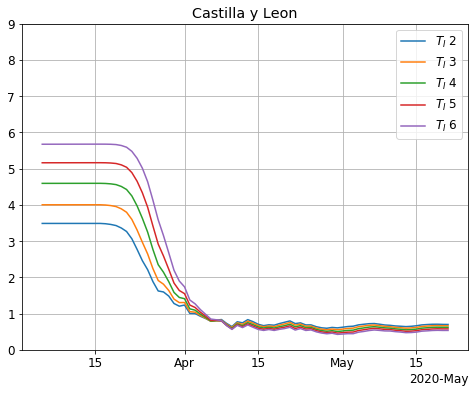

In [285]:
blind = False
caname = 'Castilla y Leon'
tms    = (2, 3, 4, 5, 6)
plt.figure(figsize = (8, 6))
for xtd in tms:
    times = (xtd, 3.5, 6.)
    print(times)
    xdata = ana_ca(caname, times, blind = blind, plot = False) 
    dates, rs = xdata['dates'], xdata['rs']
    plt.plot(dates, rs, label = r'$T_I$ '+str(xtd))
c19ma.formatter(plt.gca()); plt.grid();
plt.legend(); plt.title(caname); plt.ylim((0., 9));

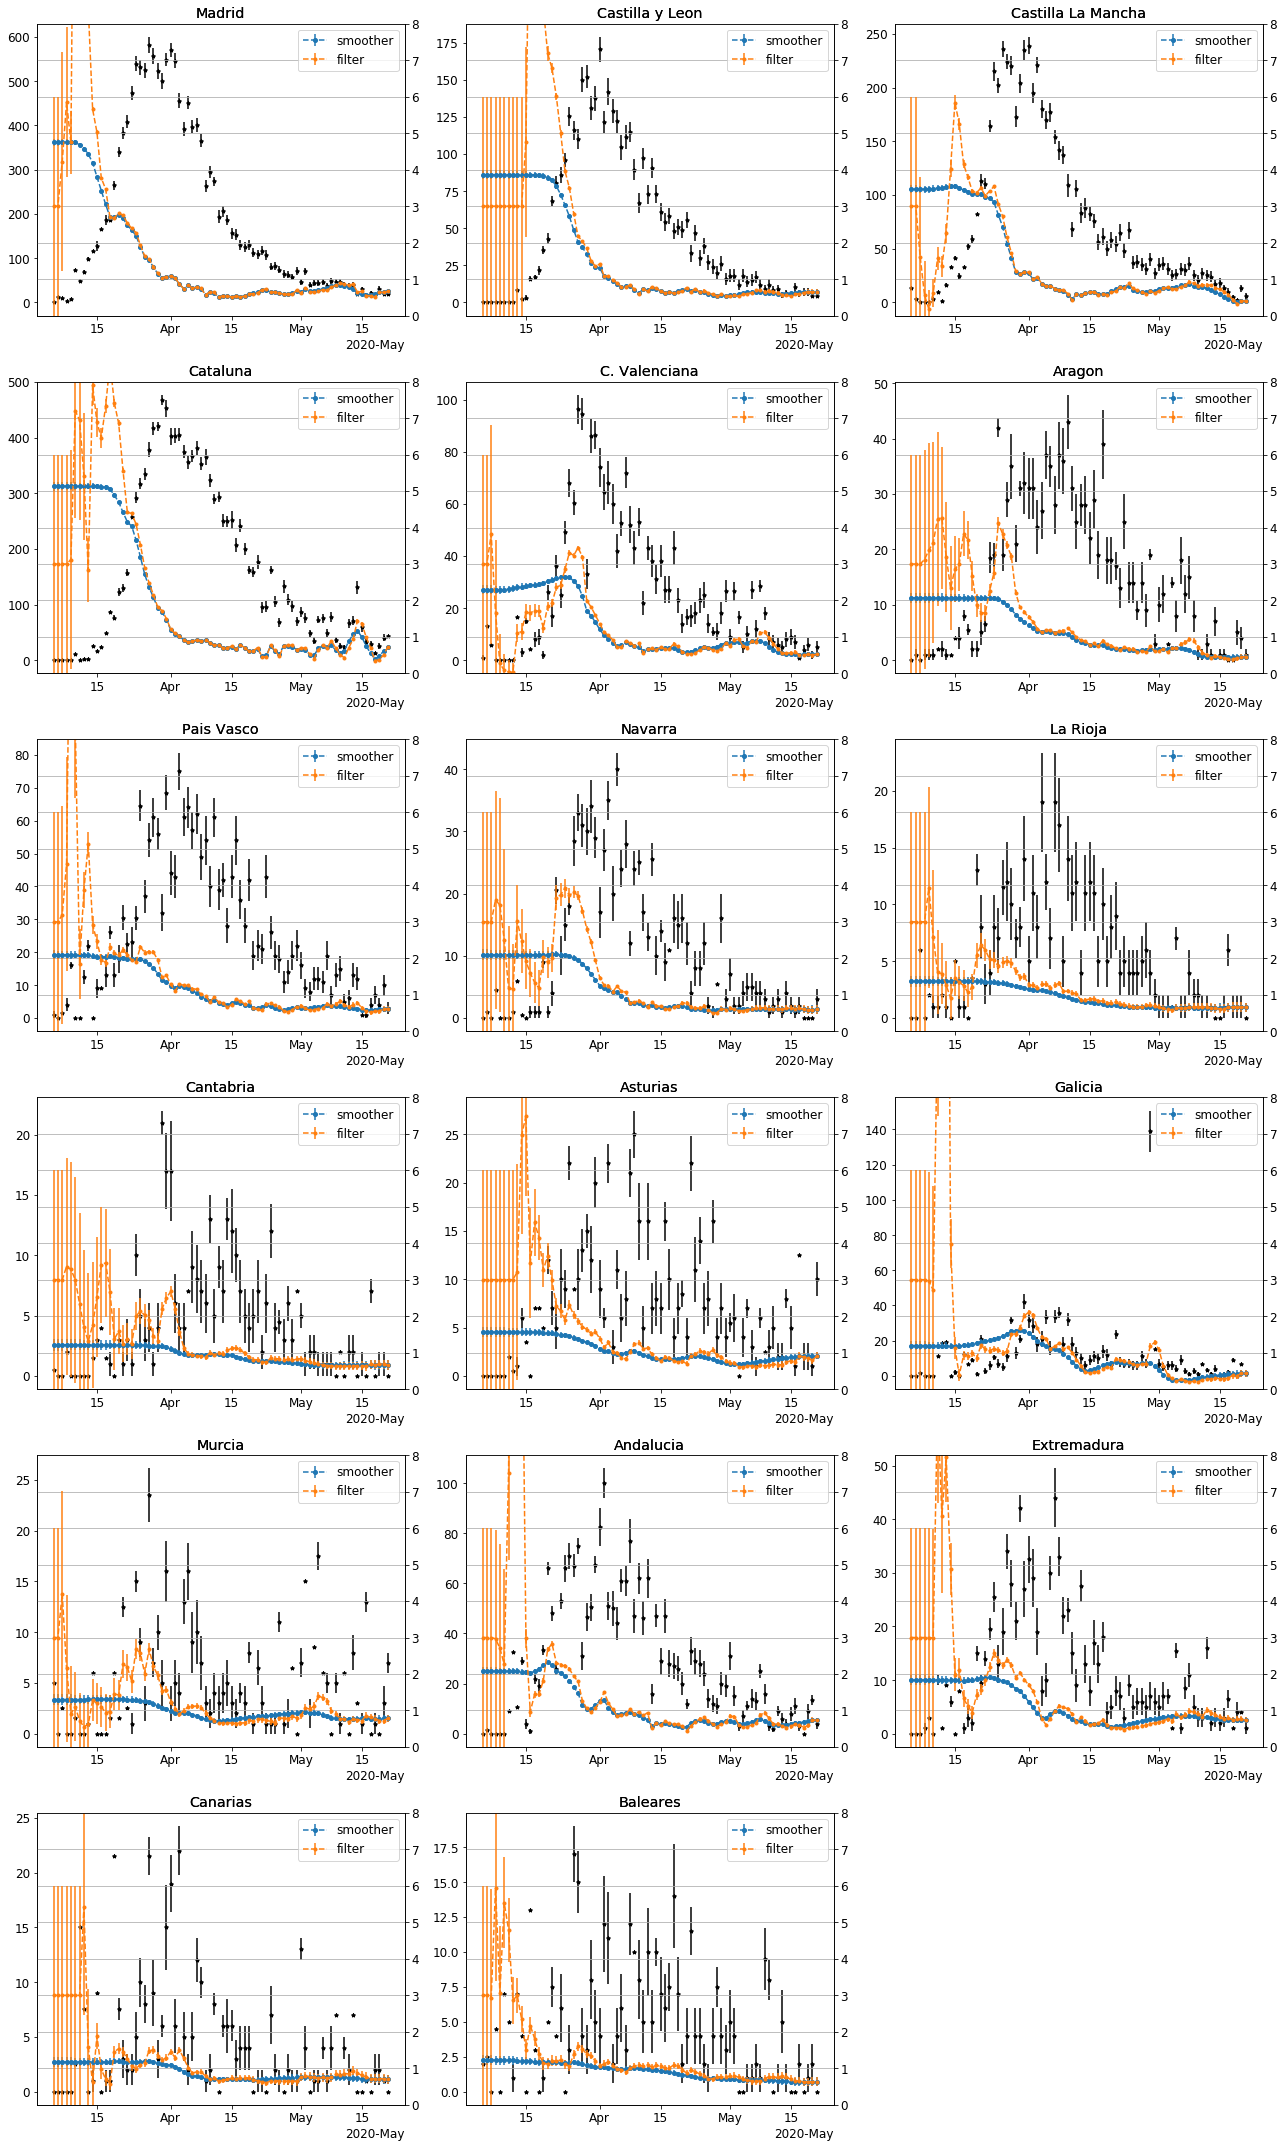

In [282]:
ti, tr, tm = 3.5, 3., 6.
times = (ti, tr, tm)
blind = False

canames = ['Madrid', 'Castilla y Leon', 'Castilla La Mancha',
           'Cataluna', 'C. Valenciana', 'Aragon',
           'Pais Vasco', 'Navarra', 'La Rioja',
           'Cantabria', 'Asturias', 'Galicia',
           'Murcia', 'Andalucia', 'Extremadura',
           'Canarias', 'Baleares']
ncols, nrows = 3, 6
plt.figure(figsize = (ncols * 6, nrows * 5))

blind = False
for i, caname in enumerate(canames):
    ax = plt.subplot(nrows, ncols, i + 1, axisbelow=True)
    ana_ca(caname, times, blind, ax)
    plt.title(caname)
plt.tight_layout()